# Resampling Datetime Data (Core)

Kris Barbier

## Part 1) Load the data and make a datetime index.

Tasks:

1. First, load the data and create a datetime index.
2. Convert the date column to datetime dtype.
3. Set the date column as the index.
4. Filter out only the required data:
    - Keep only data from the year 2000 or later.
        - Keep only the following features:
            - precipitation
            - mean_temp
            - min_temp
            - max_temp
            - snow_depth
5. Impute any missing values.
Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates

In [2]:
#Read in data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [3]:
#Look at samples to determine datetime format
df['date'].sample(n=10).sort_index()

23       19790124
6704     19970510
7530     19990814
9026     20030918
12429    20130111
12662    20130901
12974    20140710
13531    20160118
14273    20180129
14929    20191116
Name: date, dtype: int64

- Need 4 digit years and 2 digit months and days.

In [4]:
#Convert date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

In [5]:
#Set date as index
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [6]:
#Filter out data for 2000 or later
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [7]:
#Explore null values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [8]:
#Impute missing temp values using interpolation
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()

In [9]:
#Impute missing precipitation values with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
#Verify filled values
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
    - If there is a specific time period, plot only that time period.

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

### Q1: What month had the most precipitation between 2000 through 2010?

1. Resample the data as Monthly frequency.
2. Find the date and corresponding value for the max precipitation.
3. Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
4. Determine the date and value for the most precipitation (the max precipitation).
5. Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    - Make sure to add a legend so that your label is visible.
    
    
#### Q1 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
    - With the title "Precipitation for 2000-2010"
    - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks.

In [11]:
#Create temporary df of data from 2000-2010
precip_cols = ['precipitation', 'snow_depth']
precip_df = df.loc[: '2010', precip_cols]
precip_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2010-12-27,5.0,1.0
2010-12-28,0.4,0.0
2010-12-29,1.4,0.0


In [19]:
#Resample to monthly frequency
precip_df_MS = precip_df.resample("MS").max()
precip_df_MS

,precipitation,snow_depth
date,,
2000-01-01,6.0,0.0
2000-02-01,16.8,0.0
2000-03-01,7.2,0.0
2000-04-01,17.2,0.0
2000-05-01,19.0,0.0
...,...,...
2010-08-01,20.6,0.0
2010-09-01,9.8,0.0
2010-10-01,21.8,0.0


In [20]:
#Find date and corresponding value for max precipitation
date_max_precip = precip_df_MS['precipitation'].idxmax()
max_precip = precip_df_MS['precipitation'].max()

#Find date and corresponding value for max snow fall
date_max_snow = precip_df_MS['snow_depth'].idxmax()
max_snow = precip_df_MS['snow_depth'].max()

print(f"The highest monthly precipitation of {max_precip:,.2f} inches occurred on {date_max_precip.strftime('%B %Y')}.")
print(f"The highest monthly snow fall of {max_snow:,.2f} inches occurred on {date_max_snow.strftime('%B %Y')}.")

The highest monthly precipitation of 36.60 inches occurred on October 2000.
The highest monthly snow fall of 12.00 inches occurred on February 2009.


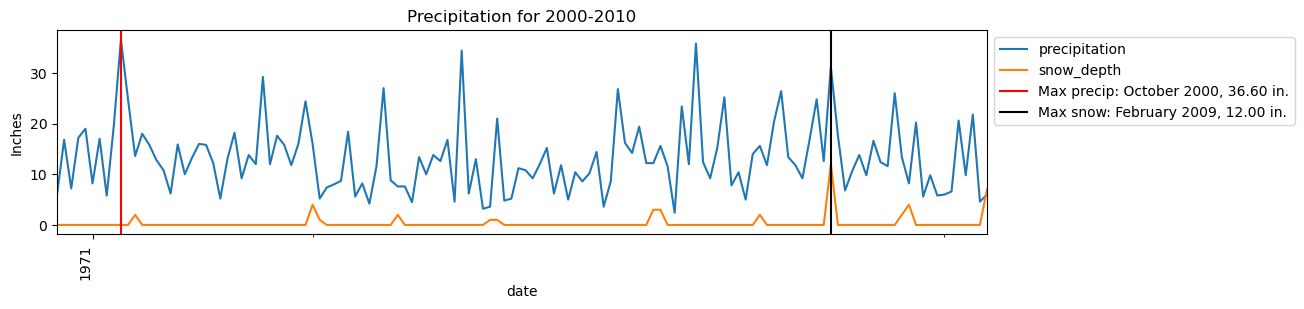

In [23]:
#Plot precipitation data
fig, ax = plt.subplots(figsize=(12,3))
precip_df_MS.plot(ax=ax)
ax.set(title = 'Precipitation for 2000-2010', ylabel = 'Inches')

#Set major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

#Set minor ticks
minor_loc = mdates.MonthLocator(interval = 3)

ax.xaxis.set_minor_locator(minor_loc)

#Add vertical line for top precipitation
ax.axvline(date_max_precip, color = 'red', 
           label = f"Max precip: {date_max_precip.strftime('%B %Y')}, {max_precip:,.2f} in.")

#Add vertical line for top snow
ax.axvline(date_max_snow, color = 'black', 
           label = f"Max snow: {date_max_snow.strftime('%B %Y')}, {max_snow:,.2f} in.")
ax.legend(bbox_to_anchor=[1,1])

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90);

### Q2: Which year between 2000-2020 had the coolest average temperature?

1. Resample the data as Yearly frequency.
2. Plot the feature and time period that corresponds to the question.
    - Make sure to meet the "Visualization Requirements" below!
3. Determine the date and value for the lowest mean temp.
4. Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.


#### Q2 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
    - With the title "Average Temperature"
    - With a ylabel of "Degrees"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 5 years.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 1 year
        - Do not label the minor ticks.

In [33]:
#Create temporary df 
temp_cols = ['mean_temp']
temp_df = df.loc['2000':, temp_cols]
temp_df

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


In [34]:
#Resample data as yearly frequency
temp_df_year = temp_df.resample("AS").mean()
temp_df_year

,mean_temp
date,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683
2005-01-01,11.822877
2006-01-01,12.290822
2007-01-01,11.944384
2008-01-01,11.326776


In [35]:
#Find date and value of lowest average temp
year_min_temp = temp_df_year['mean_temp'].idxmin()
min_temp = temp_df_year['mean_temp'].min()

print(f"The lowest average temperature of {min_temp:,.2f} degrees occurred in the year {year_min_temp.strftime('%Y')}.")

The lowest average temperature of 10.66 degrees occurred in the year 2010.


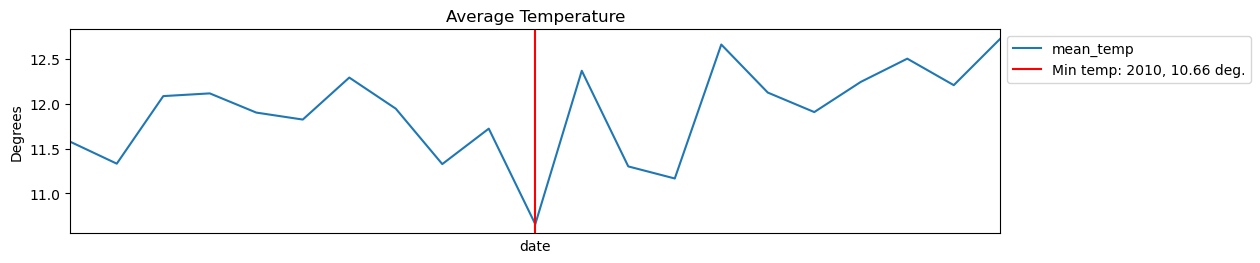

In [36]:
#Plot temperature data
fig, ax = plt.subplots(figsize=(12,3))
temp_df_year.plot(ax=ax)
ax.set(title = 'Average Temperature', ylabel = 'Degrees')

#Set major ticks
major_loc = mdates.YearLocator(5)
major_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

#Set minor ticks
minor_loc = mdates.YearLocator(1)

ax.xaxis.set_minor_locator(minor_loc)

#Add vertical line for lowest temp
ax.axvline(year_min_temp, color = 'red', 
           label = f"Min temp: {year_min_temp.strftime('%Y')}, {min_temp:,.2f} deg.")
ax.legend(bbox_to_anchor=[1,1])

#Final settings
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90);